**Here I am creating a heatmap of genes as a function of pseudotime**;
the list of genes that i am interested in derived from running gene enrichment of significant genes upon running graph_test(),
which identifies genes that vary as function of pseudotime this list of genes are stored in genegrp.csv; 
where they are categorised into themes of metabolic pathways and microglia development.

In [1]:
.libPaths("C:/Program Files/R/R-4.2.1/library")

.libPaths()


[1] "C:/Program Files/R/R-4.2.1/library"

In [2]:
setwd("C:/Users/Kei Onn/Downloads")

In [1]:
suppressPackageStartupMessages(library(monocle3))
suppressPackageStartupMessages(library(monocle))


Warning message:
"package 'matrixStats' was built under R version 4.2.2"
Warning message:
"package 'Matrix' was built under R version 4.2.2"
Warning message:
"package 'ggplot2' was built under R version 4.2.2"
Warning message:
"package 'VGAM' was built under R version 4.2.2"
Warning message:
"package 'DDRTree' was built under R version 4.2.2"
Warning message:
"package 'irlba' was built under R version 4.2.2"


loading the cds object previously created by monocle

In [4]:
cds<-readRDS(file="monocle3_cds.RDS")

genegrp.RDS is list of genes isolated from learn_graph() previously,
and are categorised into their gene enrichment terms 

In [5]:
 genegrp<-read.csv(file="singlecellgrp.csv")
head(genegrp)

,ID,pathway
,<chr>,<chr>
1,aldocb,Glycolysis
2,aldoaa,Glycolysis
3,aldoab,Glycolysis
4,eno1a,Glycolysis
5,eno3,Glycolysis
6,gpia,Glycolysis


In [6]:
genegrp=genegrp[!duplicated(genegrp[,1]),]
rownames(genegrp)<-genegrp[,1]
genegrp<-genegrp[,-1,drop=FALSE] #setting genes in genegrp as rownames

In [7]:
head(genegrp)

,pathway
,<chr>
aldocb,Glycolysis
aldoaa,Glycolysis
aldoab,Glycolysis
eno1a,Glycolysis
eno3,Glycolysis
gpia,Glycolysis


In [8]:
cds<-order_cells(cds, reduction_method = 'UMAP', root_cells = colnames(cds[,clusters(cds)==6])) #setting root pseudotime cluster 6
colData(cds)$pseudotime <- pseudotime(cds,reduction_method = "UMAP")
pseudotime<-data.frame(colData(cds)$pseudotime)



Preparing the matrix input for heatmap

In [9]:
pt.matrix <-as.matrix(normalized_counts(cds,norm_method = "log")[,order(pseudotime(cds))])
head(colnames(pt.matrix))

[1] "Juvenile_CACAGATAGTTGCGCC_1" "Juvenile_CTTTCAATCATCGCTC_1"
[3] "Juvenile_GAGAGGTAGTTGGGAC_1" "Juvenile_TAGGAGGTCTGCGAGC_1"
[5] "Juvenile_TCATTGTTCGTTCATT_1" "Juvenile_ACACGCGTCTATTGTC_4"

In [10]:
head(row.names(pt.matrix))

[1] "ptpn12"     "phtf2.1"    "CU856344.1" "lrp6"       "dusp16"    
[6] "crebl2"

In [11]:
rm(list = c('pt.matrix','cds')) #for freeing up memory

In [12]:
tpt.matrix<-readRDS(file="tpt.matrix.RDS")
head(tpt.matrix)

,Juvenile_CACAGATAGTTGCGCC_1,Juvenile_CTTTCAATCATCGCTC_1,Juvenile_GAGAGGTAGTTGGGAC_1,Juvenile_TAGGAGGTCTGCGAGC_1,Juvenile_TCATTGTTCGTTCATT_1,Juvenile_ACACGCGTCTATTGTC_4,Juvenile_ACCCTCACACACCAGC_4,Juvenile_AGCCAATGTACCTAGT_4,Juvenile_AGCGTATCAGACACAG_4,Juvenile_AGTCTCCGTAACGATA_4,⋯,Juvenile_TGAGACTGTCTGTGAT_4,Adult_TGTGAGTAGCTACTGT_3,Juvenile_CGGACACTCACAAGGG_1,Juvenile_ATAGACCTCCCAAGCG_4,Adult_TATACCTCACAGTCAT_3,Juvenile_CCTGTTGGTGGCTGAA_4,Juvenile_CAAAGAAGTTTGATCG_4,Juvenile_CCGATGGTCTGTGCTC_4,Juvenile_AGGGAGTCATCTCCCA_4,Juvenile_TTGGGATTCCGAGTGC_4
atp6v1e1b,-2.082554,-2.080736,-2.078917,-2.077098,-2.075279,-2.073460,-2.071642,-2.069823,-2.068004,-2.066185,⋯,-2.268551,-2.2706074,-2.2726643,-2.2747212,-2.2767780,-2.2788349,-2.2808918,-2.2829487,-2.2850055,-2.2870624
atp6v1f,-2.339516,-2.338234,-2.336951,-2.335668,-2.334385,-2.333102,-2.331819,-2.330537,-2.329254,-2.327971,⋯,-0.921178,-0.9227337,-0.9242894,-0.9258451,-0.9274008,-0.9289565,-0.9305122,-0.9320679,-0.9336236,-0.9351793
atp5f1c,1.839370,1.838623,1.837875,1.837128,1.836381,1.835634,1.834887,1.834140,1.833392,1.832645,⋯,-1.971621,-1.9725644,-1.9735076,-1.9744507,-1.9753938,-1.9763370,-1.9772801,-1.9782232,-1.9791664,-1.9801095
ndufa12,2.024882,2.023961,2.023041,2.022121,2.021200,2.020280,2.019360,2.018439,2.017519,2.016598,⋯,-1.811763,-1.8125795,-1.8133955,-1.8142115,-1.8150276,-1.8158436,-1.8166596,-1.8174756,-1.8182917,-1.8191077
ndufs2,1.957822,1.956964,1.956106,1.955248,1.954390,1.953532,1.952674,1.951816,1.950958,1.950100,⋯,-1.897282,-1.8981733,-1.8990650,-1.8999567,-1.9008484,-1.9017401,-1.9026319,-1.9035236,-1.9044153,-1.9053070
slc7a7,-1.670150,-1.669634,-1.669119,-1.668603,-1.668087,-1.667571,-1.667055,-1.666540,-1.666024,-1.665508,⋯,1.611374,1.6118027,1.6122309,1.6126592,1.6130875,1.6135158,1.6139441,1.6143724,1.6148007,1.6152290


formatting tpt.matrix to match rownames of pseudotime 

In [13]:
# order clusters accordint to tpt.matrix pseudotime

ann <- pseudotime



#order ann according to the tpt.matrix pseudotime
idx<-match(colnames(tpt.matrix),rownames(ann))
ann$cells<-rownames(ann)
ann<-ann[idx,]
rownames(ann)=ann$cells
ann=ann[,-2,drop=F]
all(rownames(ann)==colnames(tpt.matrix))


colnames(ann)="pseudotime"



suppressPackageStartupMessages(library(ComplexHeatmap))
suppressPackageStartupMessages(library(circlize))
suppressPackageStartupMessages(library(RColorBrewer))

ha=HeatmapAnnotation(pseudotime=anno_lines(ann$pseudotime,gp = gpar(lwd=5,col="maroon")))

[1] TRUE

Loading required package: grid

ComplexHeatmap version 2.12.1
Bioconductor page: http://bioconductor.org/packages/ComplexHeatmap/
Github page: https://github.com/jokergoo/ComplexHeatmap
Documentation: http://jokergoo.github.io/ComplexHeatmap-reference

If you use it in published research, please cite either one:
- Gu, Z. Complex heatmaps reveal patterns and correlations in multidimensional 
    genomic data. Bioinformatics 2016.
- Gu, Z. Complex Heatmap Visualization. iMeta 2022.


The new InteractiveComplexHeatmap package can directly export static 
complex heatmaps into an interactive Shiny app with zero effort. Have a try!

This message can be suppressed by:
  suppressPackageStartupMessages(library(ComplexHeatmap))


Warning message:
"package 'circlize' was built under R version 4.2.2"
circlize version 0.4.15
CRAN page: https://cran.r-project.org/package=circlize
Github page: https://github.com/jokergoo/circlize
Documentation: https://jokergoo.github.io/circlize_book/book/

If you u

Formatting the genegrp object to follow order of tpt.matrix

In [14]:


genegrp$cells=rownames(genegrp)
genegrp2<-genegrp[genegrp$cells%in%row.names(tpt.matrix),]
genegrp2<-genegrp2[,1,drop=F] #dropping the cells column

setting the order of my annotation grouping in genegrp2

In [15]:
levels_order <- c("Microglia development","Glycolysis","TCA ","Oxidative Phosphorylation")

genegrp2$pathway<-factor(genegrp2$pathway,levels=levels_order)

In [16]:
#match row order of tpt.matrix to genes in genegrp2 

idx<-match(rownames(genegrp2),rownames(tpt.matrix),)

tpt.matrix<-tpt.matrix[idx, ]
all(row.names(genegrp2)==row.names(tpt.matrix))

[1] TRUE

In [2]:
#make row annotations and grouping
themecolors=list(pathway=c("Microglia development"="#FDAE61","Glycolysis"="#ABDDA4","TCA "="navy blue","Oxidative Phosphorylation"="maroon"))
rowAnn <- HeatmapAnnotation(df=genegrp2,which = "row",col=themecolors)



#creating dendogram
kclus <- kmeans(tpt.matrix, 8)
head(kclus$cluster)
# Use the split parameter of Heatmap() in order to split the heatmap based on the k-means result:
split <- paste0("Cluster\n", kclus$cluster)

ERROR: Error in HeatmapAnnotation(df = genegrp2, which = "row", col = themecolors): could not find function "HeatmapAnnotation"


In [19]:
#creating complex heatmap
hthc <- Heatmap(
  tpt.matrix,
  name                         = "z-score",
  colorRamp2(seq(from=-2,to=2,length=11),rev(brewer.pal(11, "Spectral"))),
  show_row_names               = TRUE,
  show_column_names            = FALSE,
  row_order = rownames(genegrp2),
  split=split,
  left_annotation = rowAnn,row_names_gp =gpar(fontsize=10),
  cluster_rows                 = T,
  cluster_row_slices           = F,
  cluster_columns              = F,
  column_title = "Heatmap genes as function of pseudotime",top_annotation = ha)

`use_raster` is automatically set to TRUE for a matrix with more than
2000 columns You can control `use_raster` argument by explicitly
setting TRUE/FALSE to it.

Set `ht_opt$message = FALSE` to turn off this message.

'magick' package is suggested to install to give better rasterization.

Set `ht_opt$message = FALSE` to turn off this message.



```


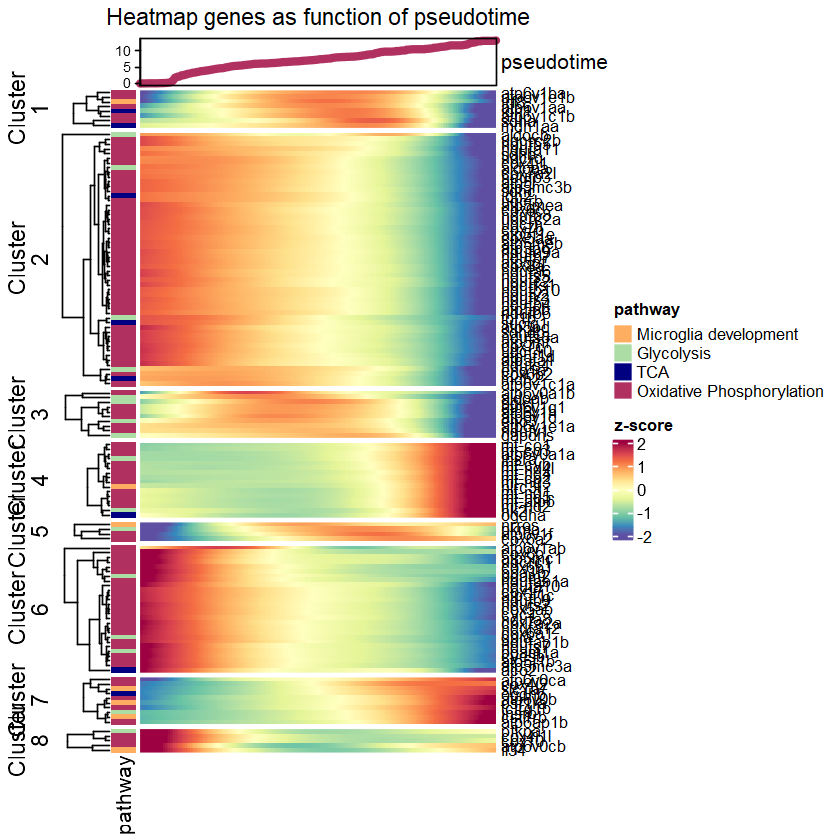

In [20]:
hthc